In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading Mashroom dataset
mash = pd.read_csv('mushrooms.csv')

In [3]:
mash.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mash.shape

(8124, 23)

In [5]:
mash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [6]:
# It seems that data doesn't have null values

In [7]:
# let's start visualizing some attributes

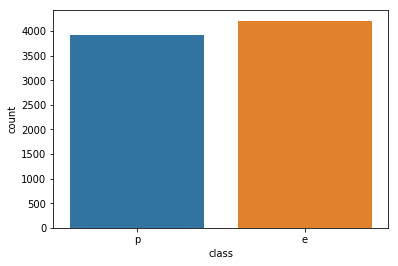

In [8]:
sns.countplot(mash['class'])

In [ ]:
# Edible Mushrooms in our data set is slightly higher than Poisonous

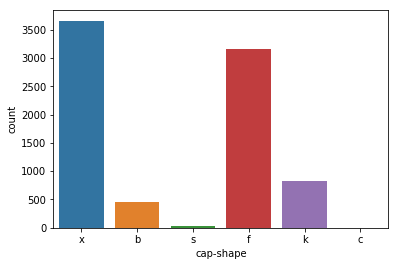

In [9]:
sns.countplot(mash['cap-shape'])

In [12]:
# Cap shape of majority of data are (x, f) -- (x = convex, f = flat)

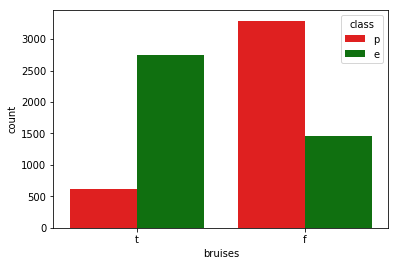

In [34]:
sns.countplot(x= 'bruises', hue = 'class', data = mash , palette=['red', 'green'])

In [27]:
# Based on our dataset :
#- Mushrooms which have bruises are likely to be edible
#- Mushrooms which don't have bruises are likely to be poisonous

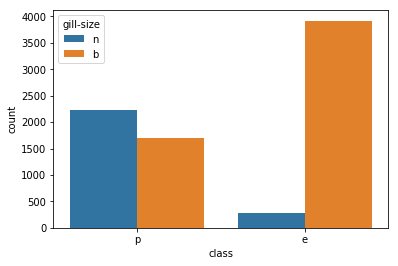

In [42]:
sns.countplot('class', hue = 'gill-size', data = mash)

In [48]:
mash.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [52]:
# transforming categorical data into numerical by get_dummy variables
mash_df = pd.get_dummies(mash, drop_first = True, columns = mash.columns)

In [53]:
mash_df.head()

,class_p_1,cap-shape_c_1,cap-shape_f_1,cap-shape_k_1,cap-shape_s_1,cap-shape_x_1,cap-surface_g_1,cap-surface_s_1,cap-surface_y_1,cap-color_c_1,...,population_n_1,population_s_1,population_v_1,population_y_1,habitat_g_1,habitat_l_1,habitat_m_1,habitat_p_1,habitat_u_1,habitat_w_1
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [55]:
# Splitting data into X, y
X = mash_df.drop('class_p_1', axis = 1)
y = mash_df['class_p_1']

In [60]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class_p_1, dtype: uint8

In [ ]:
# y variable where 1 = poisonous, 0 = edible


In [56]:
# splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [80]:
# applying feature scaling and PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [86]:
# Applying Logistic Regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [87]:
reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
pred1 = reg.predict(X_test)

In [89]:
# trying to evaluate the model using confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print('logistic regression accuracy')
print(confusion_matrix(pred1, y_test))
print('-------------------------------------')
print(classification_report(pred1, y_test))

logistic regression accuracy
[[831 107]
 [ 33 654]]
-------------------------------------
             precision    recall  f1-score   support

          0       0.96      0.89      0.92       938
          1       0.86      0.95      0.90       687

avg / total       0.92      0.91      0.91      1625

